In [307]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [309]:
import json
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from gensim.models import Word2Vec

import nltk
nltk.download("punkt")
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [310]:
!pip install tensorflow

In [311]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

In [313]:
!pip install keras

In [314]:
from keras import preprocessing

In [315]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [316]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


In [317]:
from transformers import BertTokenizer, BertModel
import re
from sklearn.metrics.pairwise import cosine_similarity

In [318]:
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [319]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [321]:
# load the data and responses from intents.json
with open('intents3.json', "r") as f:
    intents_data = json.load(f)

In [322]:
patterns = []
responses = []
tags = []

In [323]:
type(intents_data)

dict

In [324]:
intents_data

{'intents': [{'tag': 'linear regression',
   'patterns': ['What is linear regression?',
    'How does linear regression work?',
    'When to use linear regression?',
    'Explain the concept of linear regression.',
    'What are the key assumptions of linear regression?',
    'Can you illustrate how to interpret the coefficients in linear regression?',
    'Discuss the difference between simple linear regression and multiple linear regression.',
    'What is the least squares method in linear regression?',
    'How do you evaluate the performance of a linear regression model?',
    'Describe the process of feature selection in linear regression.',
    'What are some common regularization techniques used in linear regression?',
    'Explain the concept of multicollinearity in the context of linear regression.',
    'How can outliers affect a linear regression model?',
    'Discuss the importance of feature scaling in linear regression.',
    'What are some alternatives to linear regress

In [325]:
# Iterate over intents in the data
for intent in intents_data['intents']:
        tag = intent['tag']
        if tag not in tags:
            tags.append(tag)

        for pattern in intent['patterns']:
            patterns.append(pattern)

        for response in intent['responses']:
            responses.append(response)

In [326]:
# Print the first few elements of each list for verification
print("Tags:", tags)
print("Patterns:", patterns[:5])  # Print first 5 patterns
print("Responses:", responses[:5])  # Print first 5 responses
print(f"Length of tags is {len(tags)}")
print(f"Length of Patterns is {len(patterns)}")
print(f"Length of Responses is {len(responses)}")

Tags: ['linear regression', 'logistic regression', 'decision tree', 'random forest', 'neural networks', 'support vector machines', 'k nearest neighbors', 'clustering algorithms', 'dimensionality reduction', 'ensemble learning', 'deep learning', 'greeting', 'goodbye', 'thanks', 'basic interaction', 'sarcastic', 'about bot', 'about user', 'compliment', 'request', 'request more info', 'joke', 'insult', 'philosophical', 'random fact']
Patterns: ['What is linear regression?', 'How does linear regression work?', 'When to use linear regression?', 'Explain the concept of linear regression.', 'What are the key assumptions of linear regression?']
Responses: ['Linear regression is a statistical method used to model the relationship between two variables.', 'In linear regression, the relationship between the input variables (features) and the output variable (target) is assumed to be linear.', 'Linear regression is often used for predicting continuous numerical values based on input features.', 'L

In [327]:
for intent in intents_data['intents']:
    print(f"Intent: {intent['tag']}")
    print(f"  Patterns: {len(intent['patterns'])}")
    print(f"  Responses: {len(intent['responses'])}\n")

Intent: linear regression
  Patterns: 70
  Responses: 70

Intent: logistic regression
  Patterns: 70
  Responses: 70

Intent: decision tree
  Patterns: 23
  Responses: 23

Intent: random forest
  Patterns: 21
  Responses: 21

Intent: neural networks
  Patterns: 23
  Responses: 23

Intent: support vector machines
  Patterns: 23
  Responses: 23

Intent: k nearest neighbors
  Patterns: 23
  Responses: 23

Intent: clustering algorithms
  Patterns: 23
  Responses: 23

Intent: dimensionality reduction
  Patterns: 23
  Responses: 23

Intent: ensemble learning
  Patterns: 23
  Responses: 23

Intent: deep learning
  Patterns: 23
  Responses: 23

Intent: greeting
  Patterns: 10
  Responses: 10

Intent: goodbye
  Patterns: 11
  Responses: 11

Intent: thanks
  Patterns: 10
  Responses: 10

Intent: basic interaction
  Patterns: 10
  Responses: 10

Intent: sarcastic
  Patterns: 15
  Responses: 15

Intent: about bot
  Patterns: 5
  Responses: 5

Intent: about user
  Patterns: 5
  Responses: 5

Intent

## Data Visualization

## Data Visualization - Word CLoud

In [330]:
# Join all patterns and responses into single strings
all_patterns_text = ' '.join(patterns)
all_responses_text = ' '.join(responses)


In [348]:
# Generate word clouds for patterns
pattern_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_patterns_text)

# Generate word clouds for responses
response_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses_text)

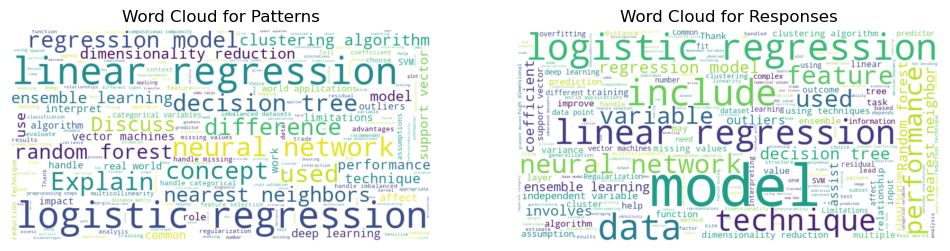

In [349]:
# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pattern_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Patterns')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(response_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Responses')
plt.axis('off')

plt.show()

In [350]:
print(pattern_wordcloud.words_)

{'linear regression': 1.0, 'logistic regression': 0.972972972972973, 'neural network': 0.43243243243243246, 'Explain': 0.3783783783783784, 'concept': 0.36486486486486486, 'used': 0.36486486486486486, 'decision tree': 0.35135135135135137, 'difference': 0.33783783783783783, 'regression model': 0.3108108108108108, 'nearest neighbors': 0.2972972972972973, 'Discuss': 0.28378378378378377, 'random forest': 0.28378378378378377, 'clustering algorithm': 0.28378378378378377, 'ensemble learning': 0.28378378378378377, 'dimensionality reduction': 0.2702702702702703, 'model': 0.25675675675675674, 'use': 0.22972972972972974, 'performance': 0.22972972972972974, 'technique': 0.22972972972972974, 'support vector': 0.21621621621621623, 'deep learning': 0.21621621621621623, 'common': 0.20270270270270271, 'vector machines': 0.20270270270270271, 'work': 0.17567567567567569, 'interpret': 0.17567567567567569, 'affect': 0.17567567567567569, 'limitations': 0.17567567567567569, 'role': 0.16216216216216217, 'algor

## Data Visualization - Frequency Count

In [352]:
# Tokenize the patterns and responses
pattern_tokens = [token for pattern in patterns for token in pattern.split()]
response_tokens = [token for response in responses for token in response.split()]

In [353]:
# Calculate word frequency
pattern_word_freq = Counter(pattern_tokens)
response_word_freq = Counter(response_tokens)

In [355]:
# Get top 50 most frequent words for patterns and responses
top_pattern_words = pattern_word_freq.most_common(70)
top_response_words = response_word_freq.most_common(70)

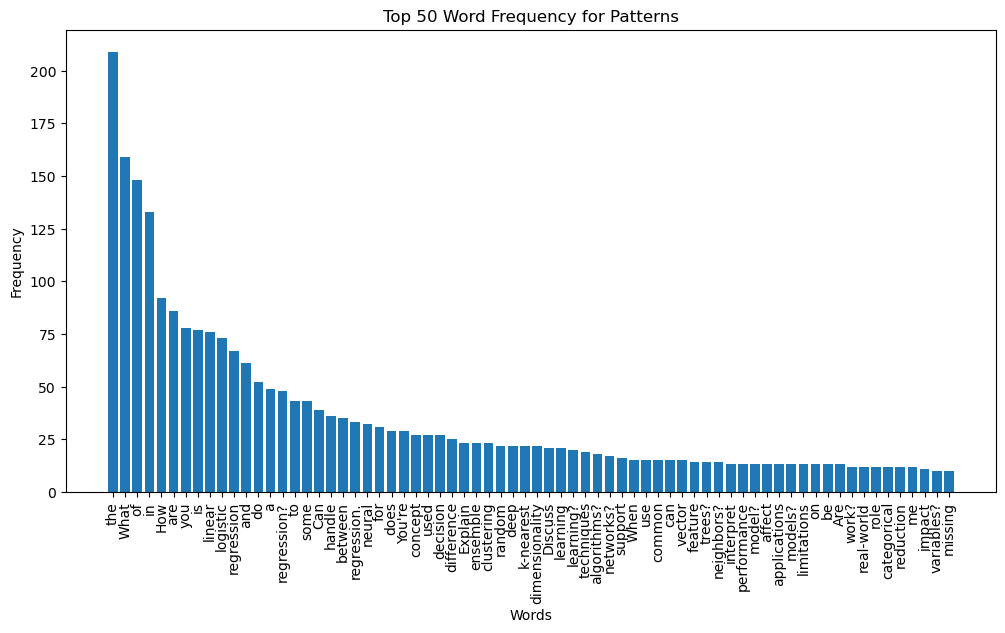

In [356]:
# Plot word frequency for patterns
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_pattern_words], [count[1] for count in top_pattern_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Word Frequency for Patterns')
plt.xticks(rotation=90)
plt.show()

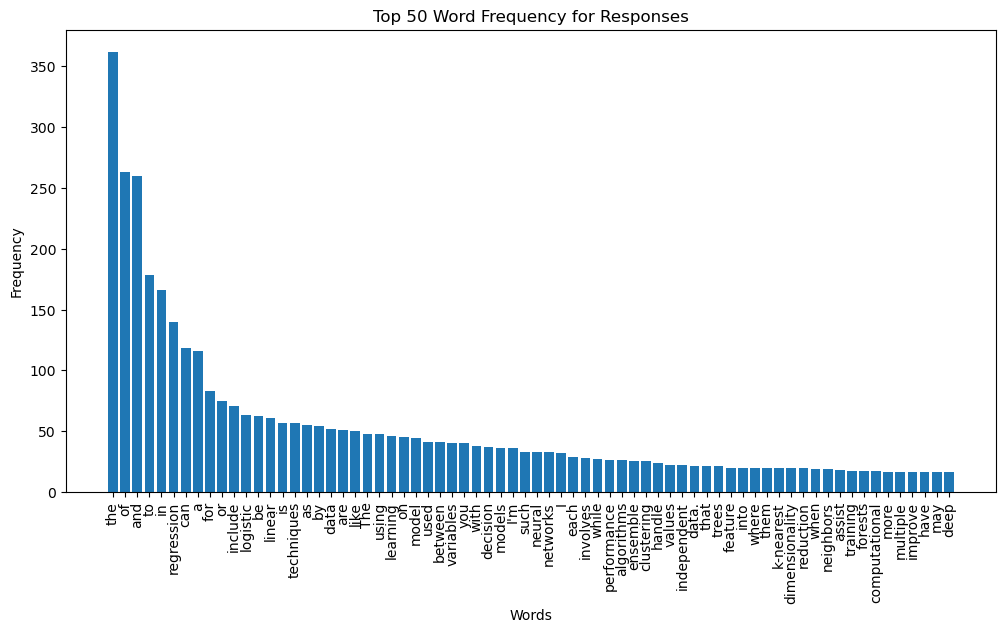

In [357]:
# Plot word frequency for responses
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_response_words], [count[1] for count in top_response_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Word Frequency for Responses')
plt.xticks(rotation=90)
plt.show()

## Data Visualization - Topic Modeling Analysis for Patterns:


In [364]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [365]:
def topic_modeling_analysis(text_series, num_topics=10):
    """
    Perform topic modeling analysis using Latent Dirichlet Allocation (LDA) on the text data.

    Parameters:
    - text_series: List of text data
    - num_topics: Number of topics to identify (default is 15)
    """
    # Convert text data to document-term matrix
    vectorizer = CountVectorizer()
    dtm = vectorizer.fit_transform(text_series)

    # Perform LDA
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(dtm)

    # Get list of feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Visualize topics
    plt.figure(figsize=(10, 6))
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-11:-1]  # Top 10 words for each topic
        top_words = [feature_names[i] for i in top_words_idx]
        plt.barh(range(len(top_words)), topic[top_words_idx], align='center', alpha=0.7, label=f'Topic {topic_idx}')
        plt.yticks(range(len(top_words)), top_words)
    plt.xlabel('Word Importance')
    plt.ylabel('Word')
    plt.title('Top Words in Each Topic (Patterns)')
    plt.legend()
    plt.show()

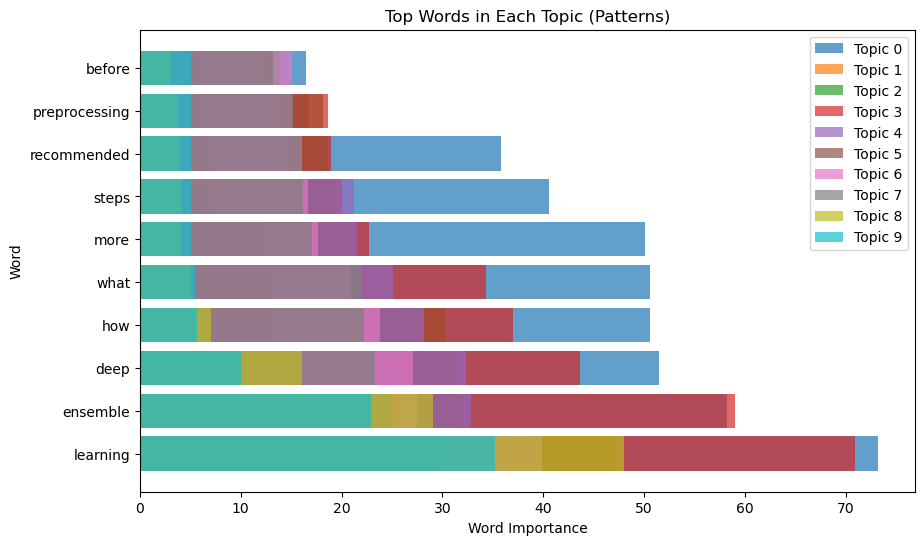

In [366]:
# Call the function with patterns data
topic_modeling_analysis(patterns)

## Call the function with responses data


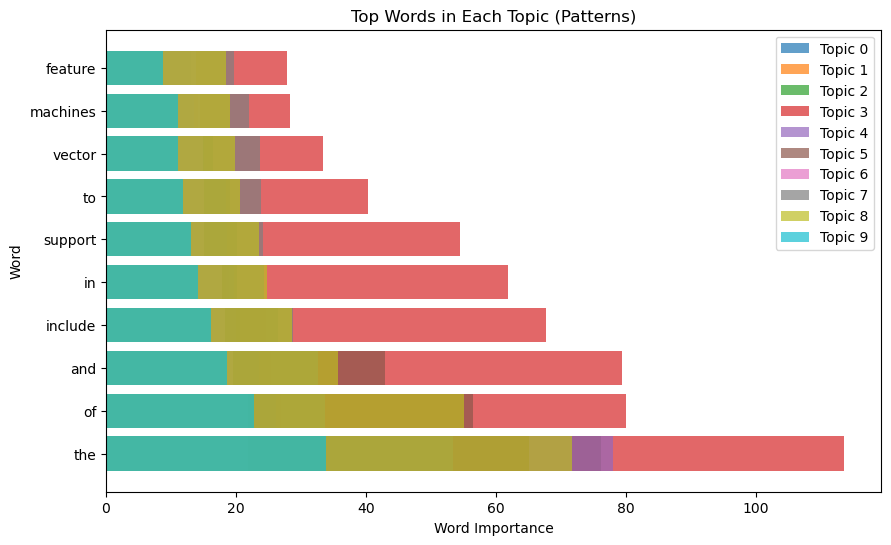

In [369]:
topic_modeling_analysis(responses)

In [370]:
from transformers import BertTokenizer,BertModel
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [371]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [373]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [381]:
from transformers import BertTokenizer,BertModel
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [384]:
# Define preprocessing function
def preprocess_sentence(sentence):
    # Remove punctuation and special characters
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Optionally remove stopwords and perform lemmatization
    stop_words = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(sentence)
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]

    return ' '.join(tokens)

In [386]:
def mean_pooling(token_embeddings, attention_mask):
    # Mask padding tokens
    mask = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    masked_embeddings = token_embeddings * mask
    # Sum embeddings across tokens
    summed = torch.sum(masked_embeddings, 1)
    # Calculate mean embeddings
    summed_mask = torch.clamp(mask.sum(1), min=1e-9)
    mean_pooled = summed / summed_mask
    return mean_pooled

In [447]:
def generate_bert_embeddings(texts):
    bert_embeddings = []
    for text in texts:
        # Preprocess the text
        preprocessed_text = preprocess_sentence(text)

        # Tokenize the preprocessed text
        inputs = tokenizer(preprocessed_text, return_tensors='pt', padding=True, truncation=True)

        # Pass the tokenized input to the BERT model
        with torch.no_grad():
            outputs = model(**inputs)

        # Perform mean pooling over the token embeddings
        mean_pooled_embedding = mean_pooling(outputs.last_hidden_state, inputs['attention_mask'])

        # Append the mean pooled embedding to the list
        bert_embeddings.append(mean_pooled_embedding)

    # Convert list of tensors to a single tensor
    bert_embeddings_tensor = torch.cat(bert_embeddings, dim=0)
    return bert_embeddings_tensor

In [389]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [391]:
# Generate BERT embeddings for patterns
bert_embeddings_patterns = generate_bert_embeddings(patterns)

In [392]:
len(responses), responses[0]

(463,
 'Linear regression is a statistical method used to model the relationship between two variables.')

In [393]:
# Generate BERT embeddings for responses
bert_embeddings_responses = generate_bert_embeddings(responses)

In [394]:
bert_embeddings_patterns.shape,bert_embeddings_responses.shape

(torch.Size([463, 768]), torch.Size([463, 768]))

In [395]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings_patterns, bert_embeddings_responses, test_size=0.2, random_state=95)

In [396]:
# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([370, 768])
X_test shape: torch.Size([93, 768])
y_train shape: torch.Size([370, 768])
y_test shape: torch.Size([93, 768])


## Logistic Regression

In [398]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
# Convert BERT embeddings to 1D arrays
y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

In [408]:
def train_best_model(X_train, y_train):
    # Define hyperparameters to tune
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1,100],  # Regularization parameter
        'penalty': ['l2']  # Penalty (L2)
    }

    # Initialize GridSearchCV with accuracy and F1-score as scoring metrics
    grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter = 1000), param_grid, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Return the best model
    return grid_search.best_estimator_

In [410]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [412]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [414]:
# Train the best model
best_model = train_best_model(X_train, y_train_flat)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


In [415]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

In [416]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_flat, y_pred))

# Confusion matrix
# print("Confusion Matrix:")
# conf_matrix = confusion_matrix(y_test_flat, y_pred)
# print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          55       0.00      0.00      0.00        13
         123       0.31      1.00      0.48        29
         172       0.00      0.00      0.00         3
         181       0.00      0.00      0.00         2
         194       0.00      0.00      0.00         2
         205       0.00      0.00      0.00         8
         211       0.00      0.00      0.00         1
         225       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         232       0.00      0.00      0.00         1
         241       0.00      0.00      0.00         3
         365       0.00      0.00      0.00         7
         402       0.00      0.00      0.00         1
         429       0.00      0.00      0.00         1
         473       0.00      0.00      0.00         2
    

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [417]:
# Call the SONI_chatbot function with the best model
SONI_chatbot(best_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.


You:  exit


SONI: Goodbye! Have a great day!


## K-Nearest Neighbors

In [421]:
from sklearn.neighbors import KNeighborsClassifier

In [422]:
def train_best_model_knn(X_train, y_train):
    # Define hyperparameters to tune
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'leaf_size': [10, 20, 30, 40, 50],
        'p': [1, 2]
    }

    # Initialize GridSearchCV with accuracy and F1-score as scoring metrics
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=-1, refit='f1')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params_knn = grid_search.best_params_
    print("Best Hyperparameters:", best_params_knn)

    # Return the best model
    return grid_search.best_estimator_

In [423]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [424]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [425]:
# Train the best model
best_model_knn = train_best_model_knn(X_train, y_train_flat)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Hyperparameters: {'leaf_size': 10, 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


In [426]:
# Predict on the test set using the best model
y_pred_knn = best_model_knn.predict(X_test)

In [427]:
print("Classification Report:")
print(classification_report(y_test_flat, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          55       0.48      0.85      0.61        13
         123       0.54      0.90      0.68        29
         172       0.00      0.00      0.00         3
         181       0.00      0.00      0.00         2
         194       0.00      0.00      0.00         2
         205       0.80      0.50      0.62         8
         211       0.00      0.00      0.00         1
         225       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         232       0.00      0.00      0.00         1
         241       0.00      0.00      0.00         3
         262       0.00      0.00      0.00         0
         365       0.00      0.00      0.00         7
         402       0.00      0.00      0.00         1
         429       0.00      0.00      0.00         1
    

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

In [428]:
# Call the SONI_chatbot function with the best model KNN Model
SONI_chatbot(best_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.


You:  exit


SONI: Goodbye! Have a great day!


SONI: Logistic regression is a statistical method used for binary classification tasks.


You:  How do you choose the appropriate dimensionality reduction technique for a given dataset?


SONI: The appropriate dimensionality reduction technique for a given dataset depends on factors like the dataset size, dimensionality, data distribution, and goals of the analysis.


You:  How do you visualize the learned representations in deep learning models?


SONI: Visualizing learned representations in deep learning models can be achieved using techniques such as t-SNE visualization, activation maximization, and feature visualization.


You:  Tell me a random fact?


SONI: The average person spends about six months of their lifetime waiting for red lights to turn green!


You:  exit


SONI: Goodbye! Have a great day!


## Decision Tree Model

In [430]:
from sklearn.tree import DecisionTreeClassifier

In [431]:
def train_best_model_dt(X_train, y_train):
    # Define hyperparameters to tune
    param_grid = {
        'criterion': ['gini', 'entropy'],  # Splitting criterion
        'max_depth': [None, 5, 10, 15],  # Maximum tree depth
        'min_samples_split': [2, 5, 10],  # Minimum samples for split
        'min_samples_leaf': [1, 5, 10]  # Minimum samples for leaf node
    }

    # Initialize GridSearchCV with accuracy and F1-score as scoring metrics
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring=['accuracy', 'f1'], n_jobs=-1, refit='f1')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params_dt = grid_search.best_params_
    print("Best Hyperparameters:", best_params_dt)

    # Return the best model
    return grid_search.best_estimator_

In [203]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [204]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [205]:
# Train the best Decesion Tree model
best_model_dt = train_best_model_dt(X_train, y_train_flat)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [206]:
# Predict on the test set using the best model
y_pred_dt = best_model_dt.predict(X_test)

In [207]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_flat, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          55       0.38      0.38      0.38        13
         123       0.67      0.69      0.68        29
         159       0.00      0.00      0.00         0
         172       0.00      0.00      0.00         3
         181       0.00      0.00      0.00         2
         194       0.00      0.00      0.00         2
         205       0.00      0.00      0.00         8
         211       0.00      0.00      0.00         1
         225       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         232       0.00      0.00      0.00         1
         241       0.00      0.00      0.00         3
         281       0.00      0.00      0.00         0
         341       0.00      0.00      0.00         0
         365       0.17      0.14      0.15         7
    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

In [67]:
# Call the SONI_chatbot function with the best model
SONI_chatbot(best_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.


You:  how are you doing ?


SONI: I'm just here to help you!


You:  who are you?


SONI: I'm just here to help you!


You:  I need your help?


SONI: Yes, I'm here to help. What do you need?


You:  who is steve jobs?


SONI: Reality is a complex concept that philosophers and scientists continue to explore.


You:      "Can dimensionality reduction techniques be applied to non-linear data?"


SONI: Non-linear dimensionality reduction techniques like t-SNE can capture complex relationships in the data that linear techniques like PCA may miss.


You:  exit


SONI: Goodbye! Have a great day!


## Support Vector Machine

In [208]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [209]:
X_train_np = X_train.numpy()
X_test_np = X_test.numpy()

y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

In [210]:
# Step 2: Train the SVM model
svm_model = SVC(kernel='linear', random_state=95)
svm_model.fit(X_train_np, y_train_flat)

SVC(kernel='linear', random_state=95)

In [211]:
# Step 3: Evaluate the model
# Predict on the test set
y_pred = svm_model.predict(X_test_np)


In [221]:
print("Classification Report:")
print(classification_report(y_test_flat, y_pred))
#print("Confusion Matrix:")
#print(confusion_matrix(y_test_flat, y_pred))

Classification Report:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          55       0.52      0.85      0.65        13
         123       0.52      0.90      0.66        29
         172       0.00      0.00      0.00         3
         181       0.00      0.00      0.00         2
         194       0.00      0.00      0.00         2
         205       0.00      0.00      0.00         8
         211       0.00      0.00      0.00         1
         225       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         232       0.00      0.00      0.00         1
         241       0.00      0.00      0.00         3
         341       0.00      0.00      0.00         0
         365       0.29      0.29      0.29         7
         402       0.00      0.00      0.00         1
         429       0.00      0.00      0.00         1
    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

In [213]:
# Call the SONI_chatbot function with the best model
SONI_chatbot(svm_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.


You:  Hi, how are you ?


SONI: Hey :-)


You:  how are you


SONI: I'm just here to help you!


You:  what do you know about linear regression ?


SONI: Linear regression is often used for predicting continuous numerical values based on input features.


You:  what do you know about neural networks?


SONI: Neural networks are a class of machine learning models inspired by the structure and function of the human brain.


You:  why do you think having activation functions are important?


SONI: Activation functions introduce non-linearities into the neural network, allowing it to learn complex mappings between inputs and outputs.


You:  what is a neuron?


SONI: Neural networks are trained using optimization algorithms like gradient descent, where the model's parameters (weights and biases) are adjusted to minimize a loss function.


You:  what is a hidden layer in neural networks?


SONI: The structure of a neural network typically consists of an input layer, one or more hidden layers, and an output layer, with connections (weights) between neurons in adjacent layers.


You:  you are a gem


SONI: Anytime!


You:  


SONI: I'm just here to help you!


You:  you are so dumb


SONI: I'm just a bot designed to assist you with your questions and tasks.


You:  bye


SONI: See you later, have a great day!


You:  exit


SONI: Goodbye! Have a great day!


## Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
def train_best_model_rf(X_train, y_train):
    # Initialize RandomForestClassifier with default parameters
    rf_model = RandomForestClassifier()

    # Fit the model
    rf_model.fit(X_train, y_train)

    return rf_model

In [216]:
# Train the best model
rf_model = train_best_model_rf(X_train, y_train_flat)

In [217]:

# Predict on the test set
y_pred = rf_model.predict(X_test_np)

In [218]:
print("Classification Report:")
print(classification_report(y_test_flat, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_flat, y_pred))

Classification Report:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          55       0.52      0.85      0.65        13
         123       0.52      0.90      0.66        29
         172       0.00      0.00      0.00         3
         181       0.00      0.00      0.00         2
         194       0.00      0.00      0.00         2
         205       0.00      0.00      0.00         8
         211       0.00      0.00      0.00         1
         225       0.00      0.00      0.00         1
         226       0.00      0.00      0.00         1
         232       0.00      0.00      0.00         1
         241       0.00      0.00      0.00         3
         341       0.00      0.00      0.00         0
         365       0.29      0.29      0.29         7
         402       0.00      0.00      0.00         1
         429       0.00      0.00      0.00         1
    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

In [219]:
def get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=None):
    # Preprocess user input
    preprocessed_user_input = preprocess_sentence(user_input)

    # Generate BERT embedding for user input
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity scores with patterns
    similarity_scores = cosine_similarity(user_input_embedding, bert_embeddings_patterns)

    # Find index of pattern with highest similarity
    best_pattern_index = np.argmax(similarity_scores)

    # Retrieve response corresponding to the best pattern
    best_response = responses[best_pattern_index]

    return best_response

In [220]:
def SONI_chatbot(model):
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # SONI chatbot interaction
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        best_response = get_best_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, model=model)
        print("SONI:", best_response)

In [148]:
SONI_chatbot(rf_model)

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.
You: What is the role of the decision boundary in random forest models?
SONI: Random forests offer built-in methods for tuning hyperparameters, allowing users to optimize model performance for specific tasks.
You:         "What is the role of pruning in preventing overfitting in random forest models?",
SONI: Random forests offer built-in methods for tuning hyperparameters, allowing users to optimize model performance for specific tasks.
You:         "How do you diagnose and address bias in random forest models?",
SONI: Random forests can handle data with mixed feature types, including both continuous and categorical variables, without the need for feature preprocessing.
You: "Random forests consist of a collection of decision trees, each trained on a random subset of the training data, and their predictions are combined through voting or averaging."
SONI: Random forests provide measures of unc

## Integrating T5 model for a more generalised chatbot features.

In [237]:
from transformers import T5Tokenizer, T5Model

In [238]:
# load t5 tokenizer and model
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5Model.from_pretrained("t5-small")

In [248]:
def hybrid_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses, similarity_threshold=0.9):
    # Preprocess and embed user input
    preprocessed_user_input = preprocess_sentence(user_input)
    user_input_embedding = generate_bert_embeddings([preprocessed_user_input])

    # Calculate similarity score between user input and best response
    similarity_score = cosine_similarity(user_input_embedding, bert_embeddings_responses)
    best_pattern_index = np.argmax(similarity_score)
    best_similarity_score = similarity_score[0, best_pattern_index]

    if best_similarity_score >= similarity_threshold:
        return responses[best_pattern_index]
    else:
        # Use T5 for dynamic responses
        input_text = f"question: {user_input} context:"
        input_ids = t5_tokenizer.encode(input_text, return_tensors="pt")  # Correct encoding
        outputs = t5_model.generate(input_ids)
        return t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [249]:

def SONI_chatbot():
    print("SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.")

    # Chatbot interaction loop
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == 'exit':
            print("SONI: Goodbye! Have a great day!")
            break

        # Get the best response
        best_response = hybrid_response(user_input, patterns, responses, bert_embeddings_patterns, bert_embeddings_responses)
        print("SONI:", best_response)


In [250]:
SONI_chatbot()

SONI: Hi! I'm SONI, your chatbot. Ask me any question or type 'exit' to end the conversation.


You:  what is linear regression ?


TypeError: T5ForConditionalGeneration.forward() got an unexpected keyword argument 'token_type_ids'